# Setup

In [1]:
import pypulse
import pypulse.visualization as viz

from pypulse.systems import Transmon

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import qutip as qt

from itertools import product, combinations

import datetime as dt
import os

if 'berkeley' in plt.style.available:
    plt.style.use('berkeley')

# Coupled Transmon System

We will now consider a system of two coupled Transmons. These may be coupled directly or coupled via a resonator, but we will only consider the effective coupling between them. Furthermore, we will first diagonalize the Transmons individually before applying the coupling term as a perturbation.

We can consider the total Hamiltonian as

$$H(t) = H_1(t) + H_2(t) + H_c(t)$$

where $H_i(t) = H_{i,0} + H_{i, \mathrm{drive}}$ is the total Hamiltonian for the $i$th transmon and $H_c(t)$ is the (possibly) time-dependent coupling between the two transmons. As in the previous notebook, the system Hamiltonian for the $i$th transmon is given by

$$H_{i, 0}(t) = \sum_n\omega_n(t) |n\rangle\langle n|$$

## Coupling Term

The coupling term of the Hamiltonian depends on the form of the coupling. For two capacitively coupled transmons, we have

$$ H_c(t) = -g(t) (a_1 - a_1^\dagger)(a_2 - a_2^\dagger) = g(t) \left(a_1a_2^\dagger + a_1^\dagger a_2 - a_1 a_2 - a_1^\dagger a_2^\dagger\right)$$

where $g(t)$ may be time-dependent. The time-dependence of $g$ generally comes from the some flux-tunable element between the two transmons that allows one to tune the effective coupling strength between the two transmons. 

Finally, while people often drop the latter two terms by making the RWA, you must consider the relevant coupling strengths before making such an approximation. In particular, you should have $g(t) << \omega_d$ in order to justify this approximation. (This is generally not true for parametric driving at the qubit detuning frequency).

## Microwave Drive Hamiltonian

The microwave drive hamiltonian is similar to the single qubit case, but slightly modified to account for the presence of crosstalk. Using a somewhat simplistic model of crosstalk, we can write

$$H_{i, \mathrm{drive}}(t) = \frac{1}{2}\left(\gamma_i(t) + \gamma_i^*(t)\right) i \left[(a_i - a_i^\dagger) + \beta_j(a_j - a_j^\dagger)\right]$$

where $\beta_j$ is some complex coefficient that accounts for a reduction of amplitude at the second qubit as well as a constant phase shift. Thus, we have $|\beta_j| \leq 1$. As in the single qubit case, we write

$$\gamma_i(t) = \Omega_i(t) e^{i\omega_{i,d} t}$$

where we fold the phase of the carrier signal into $\Omega_i(t)$. 

## Cross Resonance Effect

The cross resonance effect is often used to engineer two qubit gates with only microwave drives. 

## Parametric Driving

## Drive Hamiltonian

Generally, the field applied to a transmon via a control line is coupled to the transmon mode capacitively, so this coupling can be described by the hamiltonian

$$H_\mathrm{drive}(t) = \frac{1}{2}\left(\gamma(t) + \gamma^*(t)\right) i (a - a^\dagger)$$

where $\gamma(t)$ is the amplitude of the field, written in complex notation. We note that if our qubit is inductively coupled to the field, this would take the form $a + a^\dagger$

Generally we think of $\gamma(t)$ as consisting of a carrier that gets mixed with a pulse envelope. Thus, we can write

$$\gamma(t) = \Omega(t) e^{i(\omega_d t +\phi)}$$

where $\Omega(t) = I(t) + iQ(t)$ is the pulse envelope which is often written in terms of the in phase ($I$) and quadrature ($Q$) components. Thus we can write the total drive Hamiltonian as

$$H_\mathrm{drive}(t) = \frac{1}{2}\left(\Omega(t)e^{i(\omega_d t + \phi)} + \Omega^*(t) e^{-i(\omega_d t + \phi)}\right) i (a - a^\dagger)$$

In the following analysis we will just absorb $\phi$ into our definition of $\Omega(t)$

## Rotating Frames and the RWA

We can move into the frame of the drive (the "rotating frame") by applying a unitary transformation given by

$$U = \exp{i\omega_d t a^\dagger a} = \sum_n e^{in\omega_d t} |n\rangle \langle n|$$

The drive hamiltonian in the rotating frame [2] is then given by 

$$\widetilde{H}_\mathrm{drive} = U H_\mathrm{drive} U^\dagger + i\dot{U}U^\dagger$$

Since $a$ and $a^\dagger$ the only operators in $H_\mathrm{drive}$, we can simply compute

$$U a U^\dagger \rightarrow e^{i\omega_d t} \qquad Ua^\dagger U^\dagger \rightarrow e^{-i\omega_d t}$$

You may convince yourself that this is true by writing $a$ as $a = \sqrt{n}|n-1\rangle\langle n|$. Now after applying this transformation, the drive Hamiltonian becomes

$$\widetilde{H}_\mathrm{drive} = -\omega_d a^\dagger a + \frac{1}{2} i \left(\Omega(t) a - \Omega^*(t) a^\dagger  - \Omega(t) a^\dagger e^{2i\omega_d t} + \Omega^*(t) a e^{-2i\omega_d t} \right)$$

The rotating wave approximation (RWA) states that since the last two terms are oscillating at a frequency $2\omega_d$, the contribution to the dynamics from these terms will average out on the timescale of interest. To understand when the RWA is able to applied, you should compare $\Omega(t)$ and $2\omega_d$, since $\max\{\Omega(t)\}$ dictates the timescale of the dynamics of interest and $2\omega_d$ dictates the timescale on which the fast oscillations become relevant. (In most cases when analyzing single qubit dynamics, $\max\{\Omega(t)/2\pi\} < 100$ MHz and $2\omega_d/2\pi \sim 5$ GHz so this is valid). See [3] for a discussion on when the RWA is valid.

After dropping the fast oscillating terms (making the RWA), the drive hamiltonian looks like

$$\widetilde{H}_\mathrm{drive} = -\omega_d a^\dagger a + \frac{1}{2}i \left(\Omega(t) a - \Omega^*(t) a^\dagger\right)$$

which is the canonical hamiltonian you'll often see. This can also be written in terms of $I$ and $Q$ by taking $\Omega(t) = I(t) + iQ(t)$

$$\widetilde{H}_\mathrm{drive} = -\omega_d a^\dagger a + \frac{1}{2}\left(I(t) (a - a^\dagger)+ iQ(t)(a + a^\dagger)\right)$$

Finally, if we choose to remain in the lab frame, we can still make the RWA by droppping the appropriate terms after which

$$H_\mathrm{drive} \rightarrow \frac{1}{2}i\left(\Omega(t) a e^{i\omega_d t} + \Omega^* (t) a^\dagger e^{-i\omega_d t}\right)$$

### A small aside

We note that the $i = e^i\pi/2$ out front is simply a global phase, which we can always absorb into our definition of $\Omega(t)$. If we do this, we see that the drive Hamiltonian becomes

\begin{align}
\widetilde{H}_\mathrm{drive} 
&= -\omega_d a^\dagger a + \frac{1}{2}\left(a \Omega(t) + a^\dagger \Omega^*(t)\right) \\
&= -\omega_d a^\dagger a + \frac{1}{2}\left(I(t) (a + a^\dagger) + iQ(t) (a-a^\dagger) \right) \\
&\rightarrow -\omega_d (I - \sigma_z)/2 + \frac{1}{2}\left( I(t) \sigma_x + iQ(t) \sigma_y\right)
\end{align}

where in the last step we take the 2 level approximation. This is why you'll often see people describe $I$ and $Q$ as driving the $X$ and $Y$ quadratures of the qubit, but it is worth remembering that this is only true under the RWA. 

In order to engineer the RWA hamiltonian exactly, you would need to couple to supplement the capacitively coupled driving field with an inductively coupled driving field that is 90 degrees out of phase. This is similar to driving a spin system with circularly polarized light. See [4].

## Combining the System and Drive Hamiltonians

If we combine the system and drive hamiltonians, we see that in the frame of the drive, we have

$$H(t) = \Sigma_n \omega_n |n\rangle\langle n| -\omega_d a^\dagger a + \frac{1}{2}i\left(\Omega(t) a - \Omega^*(t)a^\dagger\right)$$

Normally, if when doing a single qubit gate we'll have $\omega_d = \omega_{01}$. But since $\omega_n \neq n\omega_{01}$ for a transmon, we'll be left with a drift hamiltonian, defined as 
$$H_\mathrm{drift} = H_\mathrm{system} - \omega_d a^\dagger a$$

The total hamiltonian in the frame of the drive is now given by (under the RWA)
$$H(t) = H_\mathrm{drift} + \frac{1}{2}\left(\Omega(t) a + \Omega^*(t) a^\dagger \right)$$

This can also be written in the lab frame (under the RWA) as
$$H(t) = H_\mathrm{system} + \frac{1}{2}\left(\Omega(t) a e^{i\omega_d t} + a^\dagger e^{-i\omega_d t}\right)$$

Finally, we may wish to not make the rotating wave approximation, in which case our lab frame hamiltonian is
$$H(t) = H_\mathrm{system} + \frac{1}{2}\left(\Omega(t) e^{i\omega_d t} + a^\dagger e^{-i\omega_d t}\right)(a + a^\dagger)$$

[1] https://arxiv.org/abs/1904.06560

[2] https://en.wikipedia.org/wiki/Unitary_transformation_(quantum_mechanics)

[3] https://berkeleyqnl.slack.com/archives/CL2NFJDC4/p1588306894337700

[4] https://journals.aps.org/pra/abstract/10.1103/PhysRevA.90.012302

# Setting up the System and Drive Hamiltonian

## Defining the System Parameters
This cell sets the 

In [194]:
Ec1, Ej1 = Transmon.compute_transmon_parameters(5.84, -0.25)
Ec2, Ej2 = Transmon.compute_transmon_parameters(5.69, -0.25)

In [255]:
N1, N2 = 3, 3

t1 = Transmon(Ec1, Ej1)
t2 = Transmon(Ec2, Ej2)

g = 2*np.pi*0.003

w1, w2 = t1.omega, t2.omega
f1, f2 = w1/(2*np.pi), w2/(2*np.pi)
alpha1, alpha2 = t1.alpha/(2*np.pi), t2.alpha/(2*np.pi)

print('f1', w1/(2*np.pi))
print('f2', w2/(2*np.pi))

a1 = qt.destroy(N1)
a2 = qt.destroy(N2)

n1 = t1.eigenbasis(N1)/w1
n2 = t2.eigenbasis(N2)/w2

H01 = qt.tensor(w1*n1, qt.qeye(N2))
H02 = qt.tensor(qt.qeye(N1), w2*n2)

Hc = g*sum([
    qt.tensor(t1.lowering_op(N1), t2.raising_op(N2)),
    qt.tensor(t1.raising_op(N1), t2.lowering_op(N2)),
    qt.tensor(t1.lowering_op(N1), t2.lowering_op(N2)),
    qt.tensor(t1.raising_op(N1), t2.raising_op(N2)),
])

H0 = H01 + H02 + Hc

display(H0)

f1 5.839447483478074
f2 5.689474157344292


Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.88495559e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 3.57480204e+01 0.00000000e+00 1.88495559e-02
  0.00000000e+00 2.63624896e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.99234091e+01 0.00000000e+00
  2.63624896e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.88495559e-02 0.00000000e+00 3.66903306e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.63700681e-02
  0.00000000e+00]
 [1.88495559e-02 0.00000000e+00 2.63624896e-02 0.00000000e+00
  7.24383511e+01 0.00000000e+00 2.63700681e-02 0.00000000e+00
  3.68804788e-02]
 [0.00000000e+00 2.63624896e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.06613740e+02 0.00000000e+00 3.68804788e-02
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000

In [256]:
ens, evs = H0.eigenstates()

In [257]:
f1, f2

(5.839447483478074, 5.689474157344292)

In [269]:
print(ens/(2*np.pi))
ZZ = (ens[1] + ens[2] - ens[5] - ens[0])/(2*np.pi)
print(ZZ*1e6, 'kHZ')

[-7.80645691e-07  5.68941261e+00  5.83950591e+00  1.11286122e+01
  1.14283981e+01  1.15291384e+01  1.69678758e+01  1.71182784e+01
  2.25572325e+01]
-219.10758440137997 kHZ


## Defining the AWG Parameters and a Pulse

In [8]:
sampling_rate = 2.5
pulse_duration = 40.0

sample_ts = np.arange(sampling_rate*pulse_duration)/sampling_rate
cosine_pulse = pypulse.cosine_ramp(pulse_duration*sampling_rate, 10*sampling_rate)

(-0.3, 0.3)

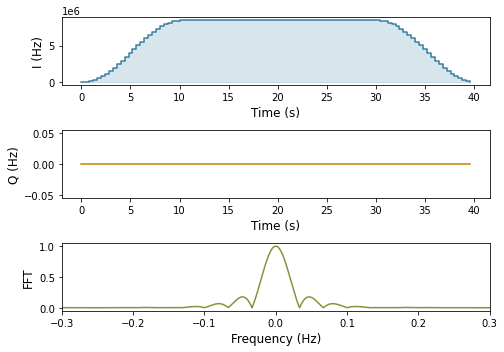

In [9]:
A = 8.449e6
fig, axes = viz.plot_pulse(sample_ts, A*cosine_pulse)
axes[-1].set_xlim(-0.3, 0.3)

In [10]:
ts, drive = pypulse.upconvert(A*cosine_pulse, w1/(2*np.pi), sampling_rate=sampling_rate, time_steps_per_sample=50, interpolate='linear')

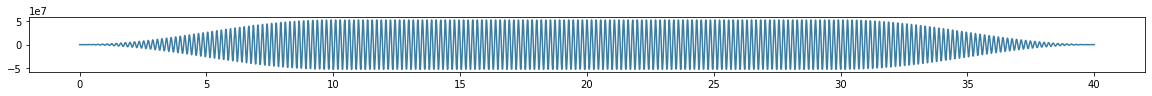

In [11]:
fig, ax = plt.subplots(figsize=(20, 1))
ax.plot(ts, np.real(drive))

# Simulating Pulses

In [109]:
def drive_hamiltonian(qid, Ns, xtalk=None, num_qubits=2):
    if xtalk is None:
        xtalk = np.zeros(num_qubits)
        xtalk[qid] = 1
    
    a_ops = [qt.destroy(N) for N in Ns]
    
    Hd = []
    
    for i, beta in enumerate(xtalk):
        if beta != 0:
            Hd += [
                qt.tensor(*[qt.qeye(Ns[j]) if j != i else beta*(a_ops[j] + a_ops[j].dag()) for j in range(num_qubits)])
            ]

    return sum(Hd)

In [270]:
# Single Qubit operators
psis1 = [qt.basis(N1, i) for i in range(N1)]
N1_ops = [psi*psi.dag() for psi in psis1]
P1_ops = [pypulse.expand_operator_dim(p, N1) for p in [qt.qeye(2), qt.sigmax(), qt.sigmay(), qt.sigmaz()]]

psis2 = [qt.basis(N2, i) for i in range(N2)]
N2_ops = [psi*psi.dag() for psi in psis2]
P2_ops = [pypulse.expand_operator_dim(p, N2) for p in [qt.qeye(2), qt.sigmax(), qt.sigmay(), qt.sigmaz()]]

In [271]:
N_ops = [qt.tensor(o1, o2) for o1, o2 in product(N1_ops, N2_ops)]
paulis = {f'{p1}{p2}': qt.tensor(o1, o2) for (p1, p2), (o1, o2) in zip(product(['I', 'X', 'Y', 'Z'], repeat=2), product(P1_ops, P2_ops))}

In [272]:
paulis['XY']

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

# Cross Resonance

In [216]:
pulse_duration=400
cosine_pulse = pypulse.cosine_ramp(pulse_duration*sampling_rate, 20*sampling_rate, 0.025)

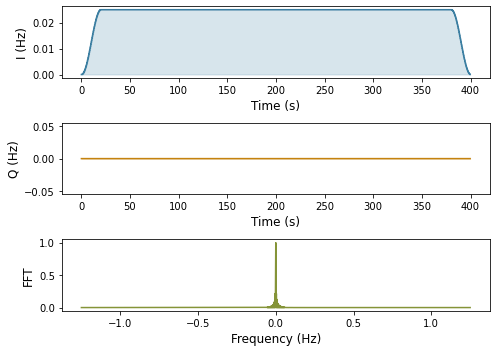

In [207]:
fig, ax = viz.plot_pulse(np.arange(len(cosine_pulse))/sampling_rate, cosine_pulse)

In [217]:
# H0 -= 2*np.pi*f1*qt.tensor(a.dag()*a, qt.qeye(2)) + 2*np.pi*f2*qt.tensor(qt.qeye(2), a.dag()*a)

display(H0)
display(Hd)

Quantum object: dims = [[3, 2], [3, 2]], shape = (6, 6), type = oper, isherm = True
Qobj data =
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.88495559e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.57480204e+01 1.88495559e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.88495559e-02 3.66903306e+01 0.00000000e+00
  0.00000000e+00 2.63700681e-02]
 [1.88495559e-02 0.00000000e+00 0.00000000e+00 7.24383511e+01
  2.63700681e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.63700681e-02
  7.18078433e+01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.63700681e-02 0.00000000e+00
  0.00000000e+00 1.07555864e+02]]

Quantum object: dims = [[3, 2], [3, 2]], shape = (6, 6), type = oper, isherm = True
Qobj data =
[[0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [1.         0.         0.         0.         1.41421356 0.        ]
 [0.         1.         0.         0.         0.         1.41421356]
 [0.         0.         1.41421356 0.         0.         0.        ]
 [0.         0.         0.         1.41421356 0.         0.        ]]

(5.66, 5.72)

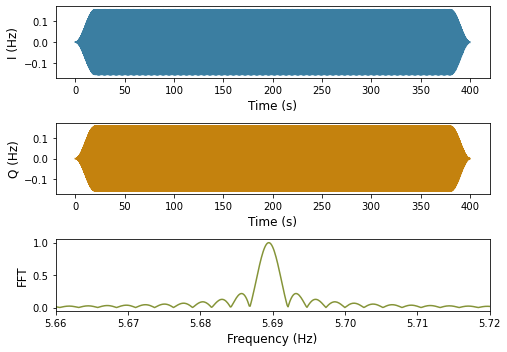

In [340]:
fig, ax = viz.plot_pulse(ts, drive)
ax[-1].set_xlim(5.66, 5.72)

In [273]:
Hd1 = drive_hamiltonian(0, (N1,N2))
Hd2 = drive_hamiltonian(1, (N1,N2))

In [334]:
np.max(np.abs(-0.165*cosine_pulse))

0.004125

In [329]:
ts, drive1 = pypulse.upconvert(cosine_pulse, f2, sampling_rate=sampling_rate, time_steps_per_sample=50)
ts, drive2 = pypulse.upconvert(-0.165*cosine_pulse, f2, sampling_rate=sampling_rate, time_steps_per_sample=50)

H = [[H0, np.ones_like(ts)], [Hd1, np.real(drive1)], [Hd2, np.real(drive2)]]

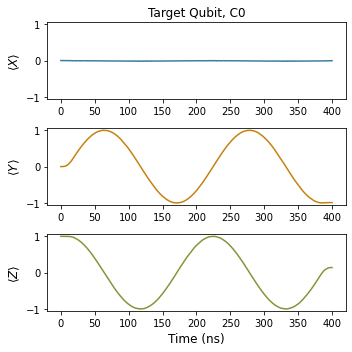

In [330]:
result = qt.mesolve(H, qt.ket('00', (N1, N2)), ts, e_ops=[paulis[p] for p in ['IX', 'IY', 'IZ']])
fig0, ax0 = viz.plot_paulis(ts, *result.expect, omega=2*np.pi*f2)
ax0[-1].set_xlabel('Time (ns)')
ax0[0].set_title('Target Qubit, C0')
fig0.tight_layout()

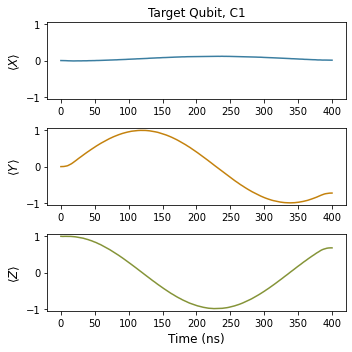

In [331]:
result = qt.mesolve(H, qt.ket('10', (N1, N2)), ts, e_ops=[paulis[p] for p in ['IX', 'IY', 'IZ']])
fig1, ax1 = viz.plot_paulis(ts, *result.expect, omega=2*np.pi*f2)
ax1[-1].set_xlabel('Time (ns)')
ax1[0].set_title('Target Qubit, C1')
fig1.tight_layout()

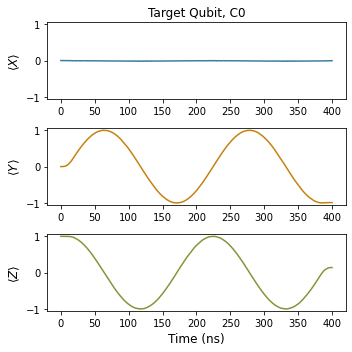

In [333]:
fig0.savefig('/Users/larrychen/QNL/lab-notebook/pages/daily-logs/2020-06/images/2020-06-27/CR-control-0-CNOT.png', dpi=250)
fig0

In [277]:
print(f2)

5.689474157344292


In [279]:
(ens[1] - ens[0])/(2*np.pi)

5.689413390461816

In [280]:
(ens[5] - ens[2])/(2*np.pi)

5.689632498046217